# Regression-based classification

#### Install dependencies

In [1]:
%pip install matplotlib scikit-learn seaborn numpy

Note: you may need to restart the kernel to use updated packages.


#### Prepare imports

In [2]:
from sklearn.datasets import load_digits # This is to load the dataset
from sklearn.decomposition import PCA  # This is to load PCA to be used to transform digits into a 2D points dataset
import matplotlib.pyplot as plt # This is to load plotting functions
import seaborn as sns; sns.set() # This is to make the plots prettier
import numpy as np # This is used to handle arrays of data

#### Data

We will be working with a dataset of handwritten digits belonging to two classes.
Let us visualise some examples.

In [3]:
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

In [4]:
# Handy plotting functions
x_min, x_max = -40, 40
y_min, y_max = -40, 40

def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2, alpha=0.5):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.legend(*scatter.legend_elements(), loc="upper left", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_decision_boundary(data, weights):
    weights = weights.flatten()
    intersection = weights[0]
    slope = - weights[1] / weights[2]
    xx = np.linspace(x_min, x_max)
    yy = slope * xx - intersection
    plt.plot(xx, yy, 'k--')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

def plot_mesh(X, pred_fn, n_class=2):
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.axis('tight')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


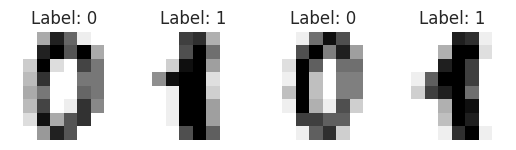

In [5]:
plot_examples()

In [6]:
# The dataset contains 2D data in the form of the `images` attribute,
# as well as a 1D-version called `data`, where the images have been flattened.
# Here we check that they are identical
np.array_equal(digits.images[0].flatten(), digits.data[0])

True

#### We can get a 2D version of the data using PCA

In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # This is the representation, we will be working with

In [8]:
# Our targets (labels) are in the set {0,1}
t_01 = digits.target
t_01

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))


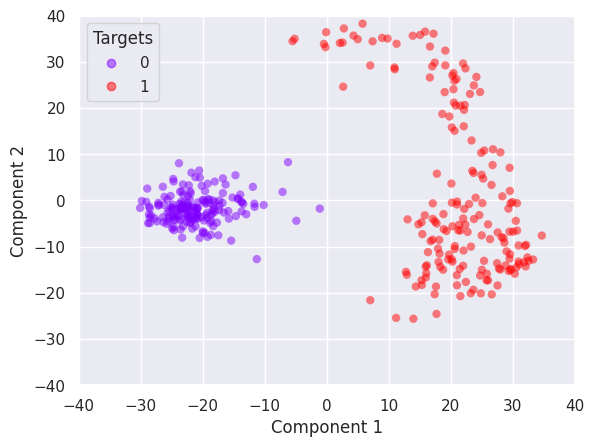

In [9]:
# Let's plot all the data points in 2D
plot_scatter(X, t_01)

## Least Squares for classification

### Calculate the weight vector using Least Squares regression from the data `X` to the target `t_01`

In [10]:
# Augment X with ones
def augment(X):
    """ Augment with bias component: phi_0(x) = 1 """
    return np.hstack((np.ones((len(X),1)), X))

X_tilde = augment(X).T

In [11]:
# Check an example
X_tilde[:, 0]

array([  1.        , -24.84615349,  -0.89358165])

In [12]:
# We need to do a one_hot encoding of our data: 0 -> [1,0], 1 -> [0,1]
def one_hot(targets, n_class):
    res = np.eye(n_class)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n_class])

t_01_tilde = one_hot(t_01, 2)
t_01_tilde

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

#### Compute the weight vector mapping `X_tilde` to `t_01` (following slide 14)

<details>
<summary>Solution</summary>
    <code>
    W_tilde = np.linalg.pinv(X_tilde.T) @ t_01_tilde<br>
    W_tilde<br>
    </code>
</details>

In [13]:
# Compute the weight vector
W_tilde = np.linalg.pinv(X_tilde.T) @ t_01_tilde
W_tilde

array([[ 0.49444444,  0.50555556],
       [-0.02182423,  0.02182423],
       [-0.00478603,  0.00478603]])

### Create class predictions using the weight vector (follow slide 12)
You should be able to correctly classify all data

<details>
<summary>Solution</summary>
    <code>
    Y = W_tilde.T @ X_tilde <br>
    preds = np.argmax(Y, axis=0)<br>
    </code>
</details>

In [14]:
def predict(W_tilde, X_tilde):
    Y = W_tilde.T @ X_tilde 
    preds = np.argmax(Y, axis=0)
    return preds

In [15]:
preds = predict(W_tilde, X_tilde)

In [16]:
# Verify that all data points are classified correctly
np.array_equal(t_01, preds)

True

#### Plot the decision boundary

/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_24807/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


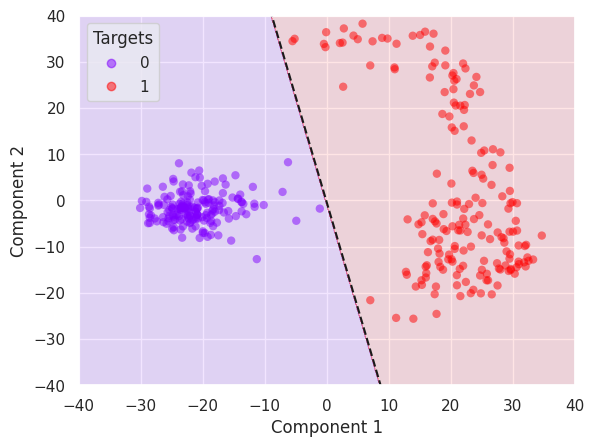

In [17]:
plot_scatter(X, preds)
plot_decision_boundary(X, W_tilde.T)
plot_mesh(X, lambda x: predict(W_tilde, augment(x).T), n_class=2)

## Logistic Regression
#### Train and test the Logistic Regression classifier

In [18]:
learning_rate = 0.1 # This is the rate of change on each update

X_train = augment(X)

# Initialise W_0 randomly
np.random.seed(42)
W_0 = 2 * np.random.random((1, X_train.shape[1])) -1 # random values in the range [-1,1]

# Our target vectors should be {0, 1}
digits = load_digits(n_class=2)
t = digits.target
t

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

#### Define the sigmoid function (following slide 20) and the error function (gradient of E(w) from slide 23)

<details>
<summary>Solution</summary>
    <code>
    s = 1/ (1 + np.exp(-a))
    </code>
</details>

In [19]:
def sigmoid(a):
    s = 1 / (1 + np.exp(-a))
    return s

def error(W, X, t):
    y = sigmoid(W @ X.T).flatten()
    yt = (y - t)
    yt = np.broadcast_to(np.expand_dims(yt,axis=1), X.shape)
    return np.sum(yt*X, axis=0)/len(t)

#### Train the Logistic Regression classifier iteratively

In [20]:
W_log_list = [W_0] # We start from a randomly initialized W_0
for epoch in range(30):
    # Add the updated W for new epoch to the list of Ws
    W_log_list.append(W_log_list[epoch] - learning_rate * error(W_log_list[epoch], X_train, t))

W_logistic = W_log_list[-1] # Keep the final W as the parameters of the logistic regression 
W_logistic

array([[-0.24404403,  0.9741933 ,  0.27898326]])

### Perform class-predictions

In [21]:
def predict_logistic(W_logistic, X_train, boundary=0.5):
    y = sigmoid(W_logistic @ X_train.T)[0]
    preds = np.array(y > boundary, dtype=int)
    return preds

In [22]:
preds = predict_logistic(W_logistic, X_train)
np.array_equal(preds, t)

True

### Plot the decision boundary

/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_24807/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


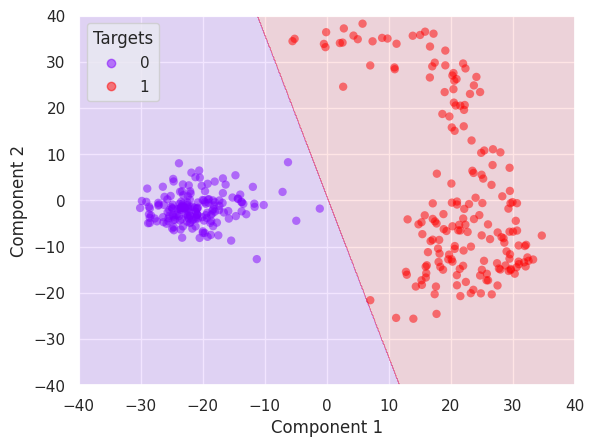

In [23]:
plot_scatter(X, preds)
plot_mesh(X, lambda x: predict_logistic(W_logistic, augment(x)), n_class=2)

## Multi-class Logistic Regression
#### Train a Logistic Regression classifier for 3 classes

In [24]:
# Data
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=2)
X_mult = pca.fit_transform(digits.data)

learning_rate = 0.1

In [25]:
X_train_mult = augment(X_mult)

t_cat = digits.target
# We need to do a one_hot encoding of our data: 1 -> [0,1,0], 2 -> [0,0,1]
t_oh = one_hot(digits.target, n_class)
t_oh

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))


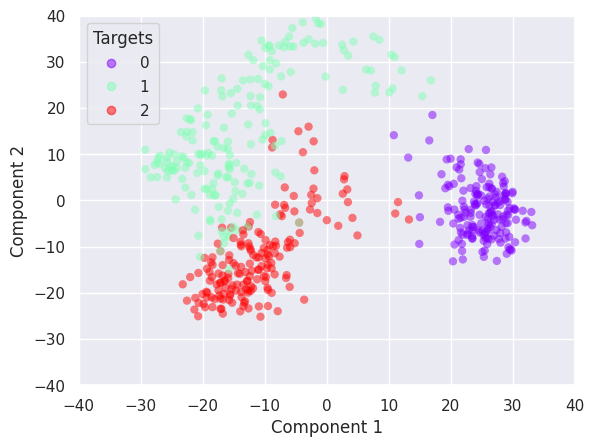

In [26]:
plot_scatter(X_mult, t_cat, n_class=n_class)

#### Define the softmax function (following slide 25) and the gradient function (following slide 27)

<details>
<summary>Solution</summary>
    <code>
    e = np.exp(x - np.max(x))  # prevent overflow<br>
    s = e / np.maximum(np.sum(e, axis=0), 1e-16) # prevent divide by zero<br>
    return s<br>
    </code>
</details>

In [27]:
def softmax(x):
    e = np.exp(x - np.max(x))  # prevent overflow
    s = e / np.maximum(np.sum(e, axis=0), 1e-16) # prevent divide by zero
    return s

def grad_error(W, X, t):
    y = softmax(W @ X.T).T
    yt = (y - t_oh)
    yt_wide = np.repeat(yt, X.shape[1],1)
    X_wide = np.tile(X, (1, yt.shape[1]))
    return np.sum(yt_wide*X_wide, axis=0).reshape(W.shape) / X.shape[0]

def predict(W, X):
    y = softmax(W @ X.T).T
    return np.argmax(y, axis=1)

def accuracy(preds, targets):
    return np.sum(preds == targets) / len(targets)

#### Initialize the classifier

In [28]:
# Weight initialisation
np.random.seed(25)
W_0 = 2 * np.random.random((n_class, X_train_mult.shape[1])) - 1
W_log_mult = [W_0]
epoch = 0

#### Display metrics for the untrained classifier

epoch = 0
acc =  0.40037243947858475


/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_24807/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


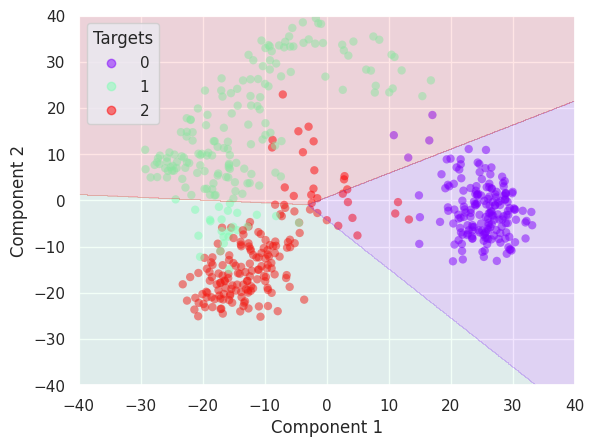

In [29]:
# Print metrics
print("epoch = {}".format(epoch))
# print("weight =  {}".format(W_log_mult[epoch]))
preds = predict(W_log_mult[epoch], X_train_mult)
print("acc =  {}".format(accuracy(preds, t_cat)))

# Plot updates weight
plot_scatter(X_mult, t_cat, n_class=n_class)
plot_mesh(X_mult, lambda x: predict(W_log_mult[epoch], augment(x)), n_class=n_class)

#### Train and test the classifier

In [30]:
W_log_mult = [W_0]
for epoch in range(50):
    W_log_mult.append(W_log_mult[epoch] - learning_rate * grad_error(W_log_mult[epoch], X_train_mult, t_oh))

W_multi_logistic = W_log_mult[-1]

epoch = 49
acc =  0.931098696461825


/tmp/ipykernel_24807/2687433608.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap=plt.cm.get_cmap('rainbow', n_class))
/tmp/ipykernel_24807/2687433608.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = plt.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


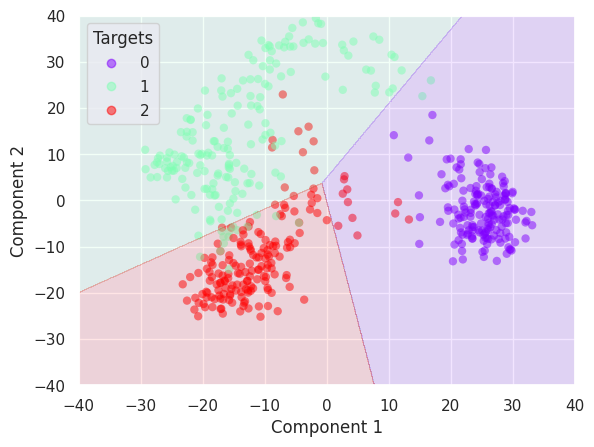

In [31]:
# Print metrics
print("epoch = {}".format(epoch))
# print("weight =  {}".format(W_log_mult[epoch]))
preds = predict(W_log_mult[epoch], X_train_mult)
print("acc =  {}".format(accuracy(preds, t_cat)))

# Plot updates weight
plot_scatter(X_mult, t_cat, n_class=n_class)
plot_mesh(X_mult, lambda x: predict(W_log_mult[epoch], augment(x)), n_class=n_class)

## Multi-class logistic regression on original data representation
Repeat exercise the previous part, but use the original data representation instead.

In [32]:
def phi(X):
    """ Augment with bias component: phi_0(x) = 1 and squared values """
    return np.hstack((np.ones((len(X),1)), X, X**2))

X_train_mult_orig = phi(digits.data / digits.data.max())
X_train_mult_orig.shape #64 + 1 dimensions

(537, 129)

In [33]:
# Weight initialisation
np.random.seed(25)
W_0 = 2 * np.random.random((n_class, X_train_mult_orig.shape[1])) - 1
W_0.shape

(3, 129)

In [34]:
W_log_mult_orig = [W_0]
for epoch in range(1000):
    W_log_mult_orig.append(W_log_mult_orig[epoch] - learning_rate * grad_error(W_log_mult_orig[epoch], X_train_mult_orig, t_oh))

W_mult_logistic_orig = W_log_mult_orig[-1]

You should be able to achieve 100% accuracy

In [35]:
preds = predict(W_mult_logistic_orig, X_train_mult_orig)
print("acc =  {}".format(accuracy(preds, t_cat)))

acc =  1.0
